## Decision Tree algorithm 
### Dataset 1

In [72]:
import nbimporter

from Helper import * 
%matplotlib inline
random_seed = 42

In [73]:
X_train, X_test, y_train, y_test = import_dataset1()

number of training samples:  24129
number of test samples:  6033


In [74]:
tree_cv.param_distributions

{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'splitter': ['best', 'random'],
 'criterion': ['gini', 'entropy'],
 'ccp_alpha': [0.0001, 0.001, 0.005, 0.01, 0.015, 0.02, 0.025]}

In [75]:
param_dist = {"max_depth": np.arange(3,15),
              "splitter": ['best', 'random'],
              "criterion": ["gini", "entropy"],
              'ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025]}


tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=StratifiedKFold(5), scoring='roc_auc')

tree_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%tree_cv.best_score_, ' Best Params : ', str(tree_cv.best_params_))


Best Score : 0.86  Best Params :  {'splitter': 'random', 'max_depth': 11, 'criterion': 'entropy', 'ccp_alpha': 0.001}


In [76]:
%%time

classifier = DecisionTreeClassifier(**tree_cv.best_params_)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)


print('training accuracy rate: {}'.format(
    accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))
print('ROC AUC score: {}'.format(roc_auc_score(y_train, y_pred_train)))

training accuracy rate: 0.8183928053379751
test accuracy rate: 0.8254599701640974
ROC AUC score: 0.7123440483811284
CPU times: user 94.5 ms, sys: 2.67 ms, total: 97.2 ms
Wall time: 96.2 ms


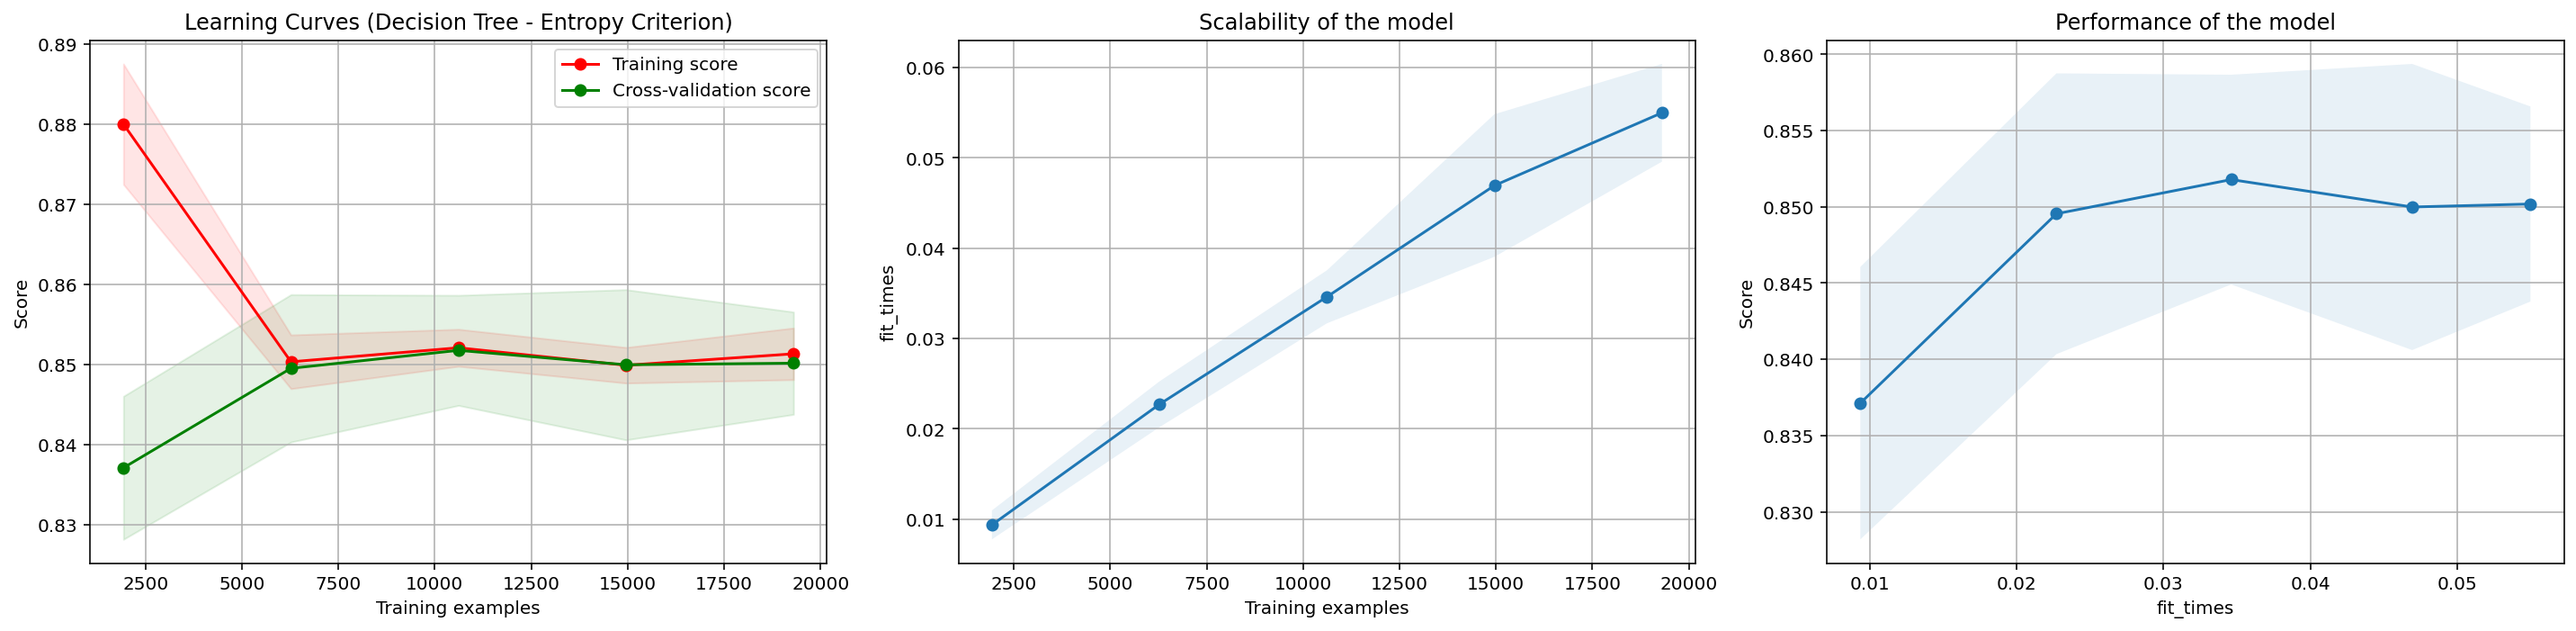

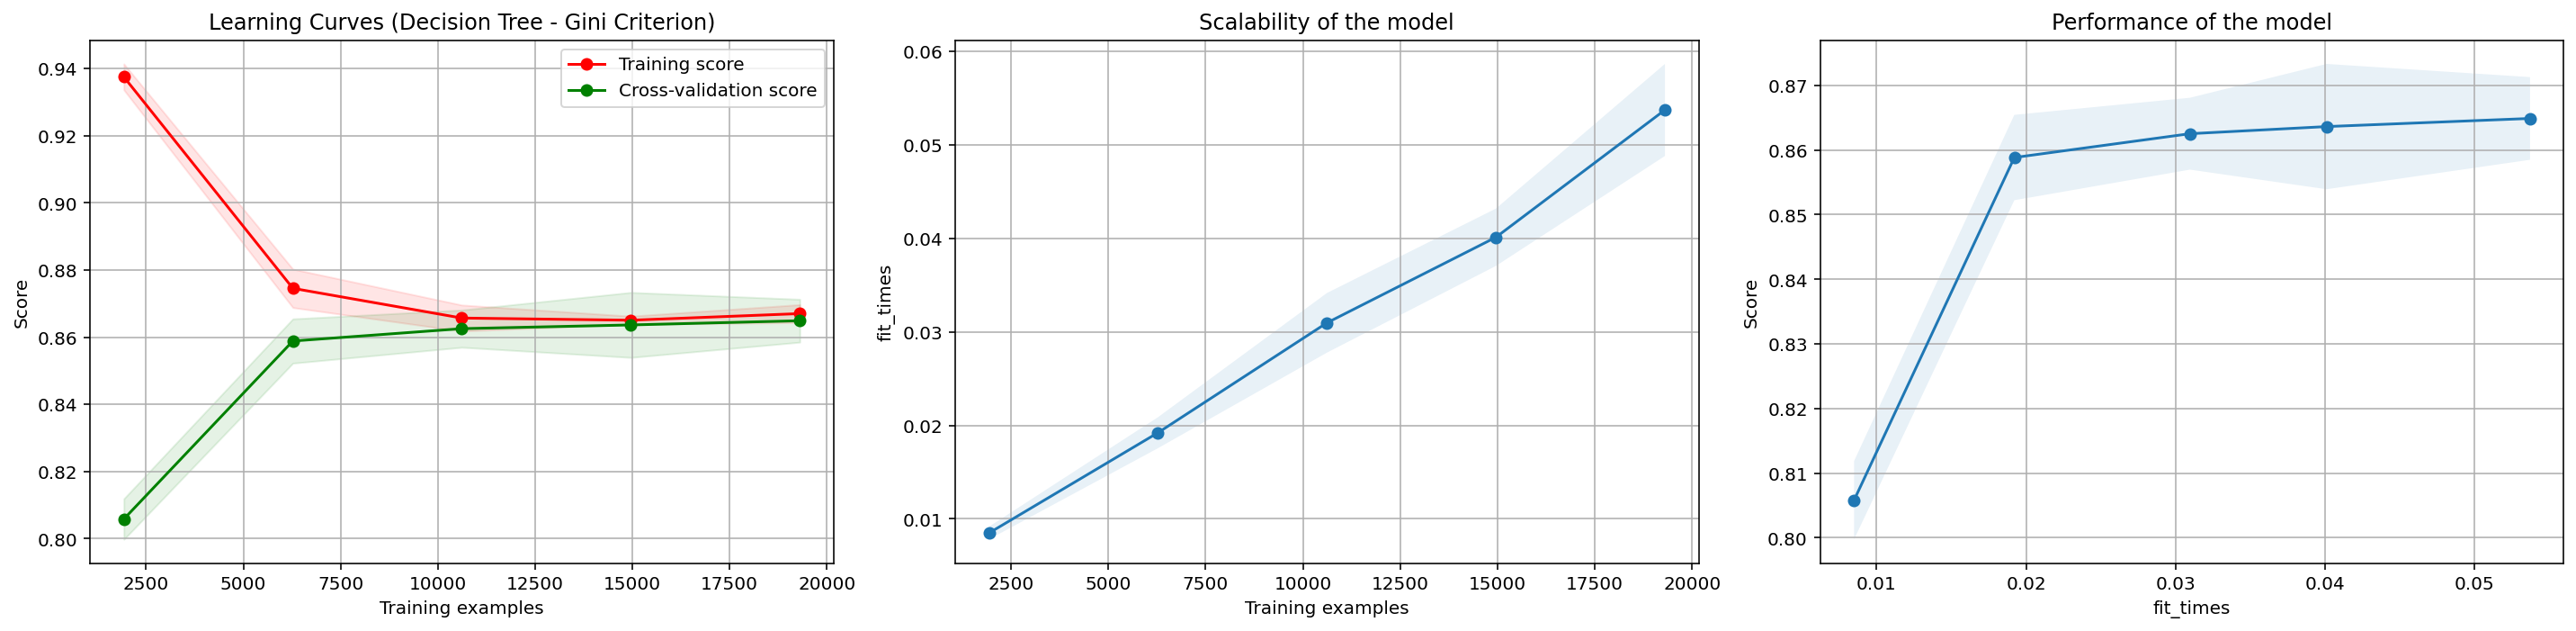

In [78]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = DecisionTreeClassifier(criterion='gini', max_depth=11, splitter='random', ccp_alpha=0.001)
estimator1 = DecisionTreeClassifier(criterion='entropy', max_depth=11, splitter='random', ccp_alpha=0.001)

plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
title = "Learning Curves (Decision Tree - Gini Criterion)"

plt.tight_layout()

plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
title = "Learning Curves (Decision Tree - Entropy Criterion)"

plt.tight_layout()

plt.show()

In [79]:
tree_cv.best_params_

{'splitter': 'random',
 'max_depth': 11,
 'criterion': 'entropy',
 'ccp_alpha': 0.001}

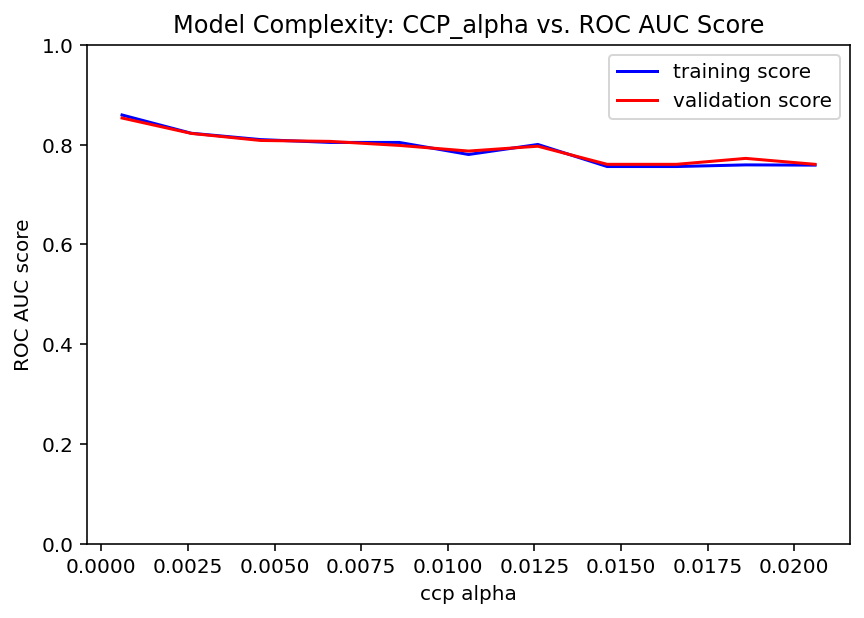

In [90]:
parameter_range = np.arange(0.0006, 0.021, 0.002)

train_score, val_score = validation_curve(DecisionTreeClassifier(max_depth= 11, criterion='gini', splitter='random'), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'ccp_alpha', 
                                          param_range = parameter_range,
                                          cv=StratifiedKFold(5))

plt.plot(parameter_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: CCP_alpha vs. ROC AUC Score')
plt.ylim(0, 1)
plt.xlabel('ccp alpha')
plt.ylabel('ROC AUC score');

In [122]:
classifier = DecisionTreeClassifier(max_depth= 11, criterion='gini', splitter='random', ccp_alpha=0.001)

In [123]:
%%time
classifier.fit(X_train, y_train)

CPU times: user 81.5 ms, sys: 30.5 ms, total: 112 ms
Wall time: 122 ms


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=11, splitter='random')

In [124]:
%%time
y_pred = classifier.predict(X_test)

CPU times: user 6.25 ms, sys: 8.19 ms, total: 14.4 ms
Wall time: 18.4 ms


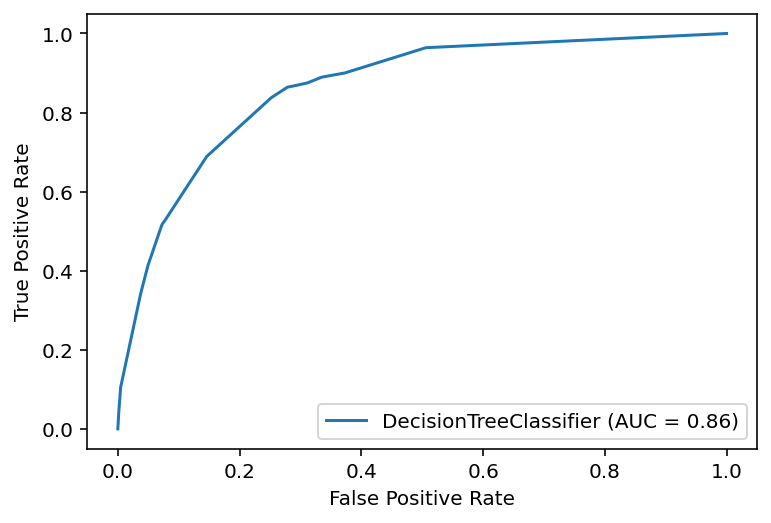

In [86]:
plot_roc_curve(classifier, X_test, y_test);

In [101]:
for importance, name in sorted(zip(classifier.feature_importances_, X_train.columns),reverse=True)[:15]:
    print (name, importance)

marital.status_Married-civ-spouse 0.6021463724759692
occupation_Prof-specialty 0.08729374719120896
education_Bachelors 0.08529411829915687
occupation_Exec-managerial 0.0767378100766312
education.num 0.057983129146404876
education_Doctorate 0.01597312419855396
age 0.015605788900379025
education_Masters 0.014068691175350824
occupation_Other-service 0.013938909601322973
education_11th 0.010941683777628823
education_Prof-school 0.010620567405293315
education_HS-grad 0.009396057752099897
workclass_Without-pay 0.0
workclass_State-gov 0.0
workclass_Self-emp-not-inc 0.0


In [92]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.853108,0.926727,0.888395,4531.000000
1,0.701170,0.518642,0.596250,1502.000000
accuracy,0.825128,0.825128,0.825128,0.825128
macro avg,0.777139,0.722684,0.742322,6033.000000
weighted avg,0.815281,0.825128,0.815661,6033.000000
